In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [11]:
milk=pd.read_csv('monthly-milk-production.csv',index_col='Month')

In [12]:
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


#### Make The Index a time series by using:

milk.index=pd.to_datetime(milk.index)

In [14]:
milk.index=pd.to_datetime(milk.index)

#### plot out the time series data

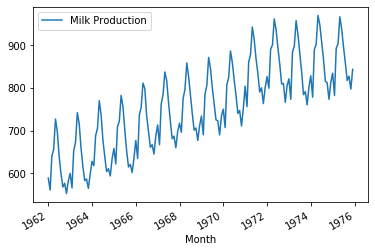

In [15]:
milk.plot()

# Train Test Split 

#### Let's attempts to predict a year's worth of data (12 month or 12 steps into the future)

#### Create a test train split using indexing(hint: use .head() or tail() or .iloc[]) we don't want a random train test split we want to specify that the test set is the last 12 month 12 months of data is the set with everything before it is training

In [16]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Milk Production  168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [18]:
train_set=milk.head(156)

In [19]:
test_set=milk.head(12)

# Scale the Data

#### Use Sklearn.preprocessing to scale the data using the MinMaxScaler Remember to only fit_transform on the training data then transform the test data .you shouldnot fit on the test data as well otherwise you are assuming you would know about future behaviour!

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=MinMaxScaler()

In [24]:
train_scaled=scaler.fit_transform(train_set)

In [25]:
test_scaled=scaler.transform(test_set)

# Batch Function

#### we will need a function that can feed batches of training data .we will need to do several things that are listed out as steps in the comments of the function.Remember to reference the previous batch method from the lecture for hints. Try to fill out the function template below ,this is a pretty hard step ,so feel free to reference this solutions

In [51]:
def next_batch(training_data,batch_size,steps):
    
    rand_start=np.random.randint(0,len(training_data)-steps)
    
    y_batch=np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)
    return y_batch[:,:-1].reshape(-1,steps,1),y_batch[:,1:].reshape(-1,steps,1)

# Setting Up The RNN Model

In [30]:
num_inputs=1
num_time_steps=12
num_neurons=100
num_outputs=1
learning_rate=0.3
num_train_iterations=4000
batch_size=1

In [31]:
x=tf.placeholder(tf.float32,[None,num_time_steps,num_inputs])
y=tf.placeholder(tf.float32,[None,num_time_steps,num_outputs])

#### Now create the RNN Layer ,you have complete freedom over this,use tf.contrib.rnn and choose anything you want, OutputProjectionWrappers. BasicRNNCells,BasicRNNCells,BasicLSTMCells,MultiRNNCell,GRUCells etc.. keep in mind not every combination will work well(if in dought,the solutions used an OutputProjection Wrapper around a basic LSTM cell with relu activation)

In [33]:
cell=tf.contrib.rnn.OutputProjectionWrapper(
      tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons,activation=tf.nn.relu),output_size=num_outputs)

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


#### Now pass in the cells variables info tf.nn.dynamic_rnn, along with your first placeholder(x)

In [35]:
outputs,states=tf.nn.dynamic_rnn(cell,x,dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Loss Function and Optimizer

#### Create a mean square Error Loss function and use it minimize a Adamoptimizer,remember to pass in your learning rate

In [36]:
loss=tf.reduce_mean(tf.square(outputs-y))

In [37]:
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
train=optimizer.minimize(loss)

#### Initilize the global Variables

In [39]:
init=tf.global_variables_initializer()

#### Create an  instance of tf.train.Saver()

In [47]:
Saver=tf.train.Saver()

# session

#### Run a tf.Session that trains on the batches created by your next_batch function.also add an a loss evaluation for every  100 training iterations remember to save your model after you are done training

In [48]:
#gpu_options=tf.GPUOP

In [52]:
with tf.Session() as sess:
    
    sess.run(init)
    for iteration in range(num_train_iterations):
        x_batch,y_batch=next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train,feed_dict={x:x_batch,y:y_batch})
        if iteration %100==0:
            mse=loss.eval(feed_dict={x:x_batch,y:y_batch})
            print(iteration,'\tMSE',mse)
    Saver.save(sess,"./ex_time_series_model")

0 	MSE 6.002998e+18
100 	MSE 35760.62
200 	MSE 30337.93
300 	MSE 24160.4
400 	MSE 31405.959
500 	MSE 34001.26
600 	MSE 18555.43
700 	MSE 9827.126
800 	MSE 27356.805
900 	MSE 8203.654
1000 	MSE 31793.625
1100 	MSE 7221.221
1200 	MSE 12973.273
1300 	MSE 9728.079
1400 	MSE 7518.486
1500 	MSE 7556.1665
1600 	MSE 6229.22
1700 	MSE 5903.7207
1800 	MSE 2020.5958
1900 	MSE 3112.2844
2000 	MSE 2811.307
2100 	MSE 2978.3015
2200 	MSE 1247.8984
2300 	MSE 1465.4219
2400 	MSE 1143.9032
2500 	MSE 889.9074
2600 	MSE 626.73804
2700 	MSE 1008.653
2800 	MSE 496.73758
2900 	MSE 315.75552
3000 	MSE 210.92964
3100 	MSE 156.27176
3200 	MSE 136.17351
3300 	MSE 114.547424
3400 	MSE 52.30603
3500 	MSE 63.295307
3600 	MSE 39.930775
3700 	MSE 47.197342
3800 	MSE 43.188343
3900 	MSE 52.690186


# Predicting Future(Test Data)

#### Show the test_set(the last 12 months of your original complete data set)

In [53]:
test_set

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
1962-06-01 01:00:00,697.0
1962-07-01 01:00:00,640.0
1962-08-01 01:00:00,599.0
1962-09-01 01:00:00,568.0


#### Now we want to attempt to predict these 12 months of data,using only the training data we had,To do this we will feed in a seed training_instance of the last 12 month of the training_set of data to predict 12 months into the future.then we will be able to compare our generated 12 months to our actual  true historical values from the test set! 

## Generative Session

#### Fill out the session code below to generate 12 month of data based of the last 12 months of data from the training set .The hardest part about this is adjusting the array with their shapes and sizes .Reference the lecture for hints.

In [55]:
with tf.Session() as sess:
    Saver.restore(sess,"./ex_time_series_model")
    
    train_seed=list(train_scaled[-12:])
    for iteration in range(12):
        x_batch=np.array(train_seed[-num_time_steps:]).reshape(1,num_time_steps,1)
        y_pred=sess.run(outputs,feed_dict={x:x_batch})
        
        train_seed.append(y_pred[0,-1,0])
    

INFO:tensorflow:Restoring parameters from ./ex_time_series_model


In [56]:
train_seed

[array([0.66105769]),
 array([0.54086538]),
 array([0.80769231]),
 array([0.83894231]),
 array([1.]),
 array([0.94711538]),
 array([0.85336538]),
 array([0.75480769]),
 array([0.62980769]),
 array([0.62259615]),
 array([0.52884615]),
 array([0.625]),
 -0.5749227,
 0.271227,
 0.35403526,
 0.8547715,
 0.66783965,
 0.38847554,
 0.09162128,
 -0.2973398,
 -0.31926024,
 -0.6102923,
 -0.2934562,
 -4.0441017]

#### Grab the portion of the results that are the generated values and apply inverse_transform on them to turn them back into milk production value units (lbs per cow) also reshape the rsult to be (12,1) so we can easilly ad them to the test-set dataframe

In [58]:
result=scaler.inverse_transform(np.array(train_seed[12:]).reshape(12,1))

#### Create a new column on the test_set called 'Generated ' and set it to equal  to the generated results.you may get a warning about this ,feel free to ignore it

In [59]:
test_set['Generated']=result

D:\Install folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### View the test_set dataframe

In [60]:
test_set

,Milk Production,Generated
Month,,
1962-01-01 01:00:00,589.0,313.832153
1962-02-01 01:00:00,561.0,665.830383
1962-03-01 01:00:00,640.0,700.278625
1962-04-01 01:00:00,656.0,908.584961
1962-05-01 01:00:00,727.0,830.821289
1962-06-01 01:00:00,697.0,714.605774
1962-07-01 01:00:00,640.0,591.114441
1962-08-01 01:00:00,599.0,429.306610
1962-09-01 01:00:00,568.0,420.187714


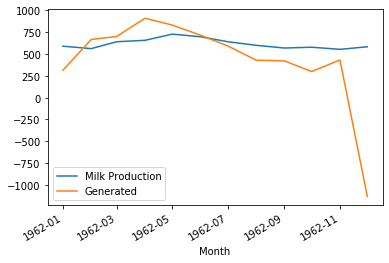

In [61]:
test_set.plot()

# LSTM detail 